In [1]:
import pandas as pd
import numpy as np
import nibabel as nib
from os.path import basename
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

df = pd.read_excel(r'IXI.xls', index_col=0)
print(df.head())

        SEX_ID (1=m, 2=f)  HEIGHT  WEIGHT  ETHNIC_ID  MARITAL_ID  \
IXI_ID                                                             
1                       1     170      80          2           3   
2                       2     164      58          1           4   
12                      1     175      70          1           2   
13                      1     182      70          1           2   
14                      2     163      65          1           4   

        OCCUPATION_ID  QUALIFICATION_ID         DOB  DATE_AVAILABLE  \
IXI_ID                                                                
1                   5                 2  1968-02-22               0   
2                   1                 5  1970-01-30               1   
12                  1                 5  1966-08-20               1   
13                  1                 5  1958-09-15               1   
14                  1                 5  1971-03-15               1   

       STUDY_DATE        

In [74]:
def get_vols(f, labels):
    data = nib.load(f).get_fdata()
    
    vols = list()
    for lb in labels:
        vols.append((data == lb).sum())
    
    return vols


def get_age(f, df):
    IXI_ID = int(basename(f).split('-')[0].replace('IXI', ''))
    if IXI_ID in df.index:
        date_available = df.at[IXI_ID, 'DATE_AVAILABLE'] if len(df.at[IXI_ID, 'DATE_AVAILABLE'].shape) == 0 else 0
        if date_available == 1 and not np.isnan(df.at[IXI_ID, 'AGE']):
            return df.at[IXI_ID, 'AGE'] 
        
    return None
    

def create_df(files, labels, df):
    data = list()
    for f in tqdm(files):
        age = get_age(f, df)
        if age is not None:
            row = get_vols(f, labels)
            row.append(age)
            row.append(int(basename(f).split('-')[0].replace('IXI', '')))
            data.append(row)
   
    return pd.DataFrame(data, columns=[x for x in range(14)])

In [75]:
labels = [10, 49, 11, 50, 12, 51, 13, 52, 17, 53, 18, 54]
files = glob(r'IXI_aseg\*.nii.gz')
d = create_df(files, labels, df)
d.to_csv('vol_age_data.csv')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:22<00:00,  3.50it/s]


-0.549
-0.491
-0.325
-0.200


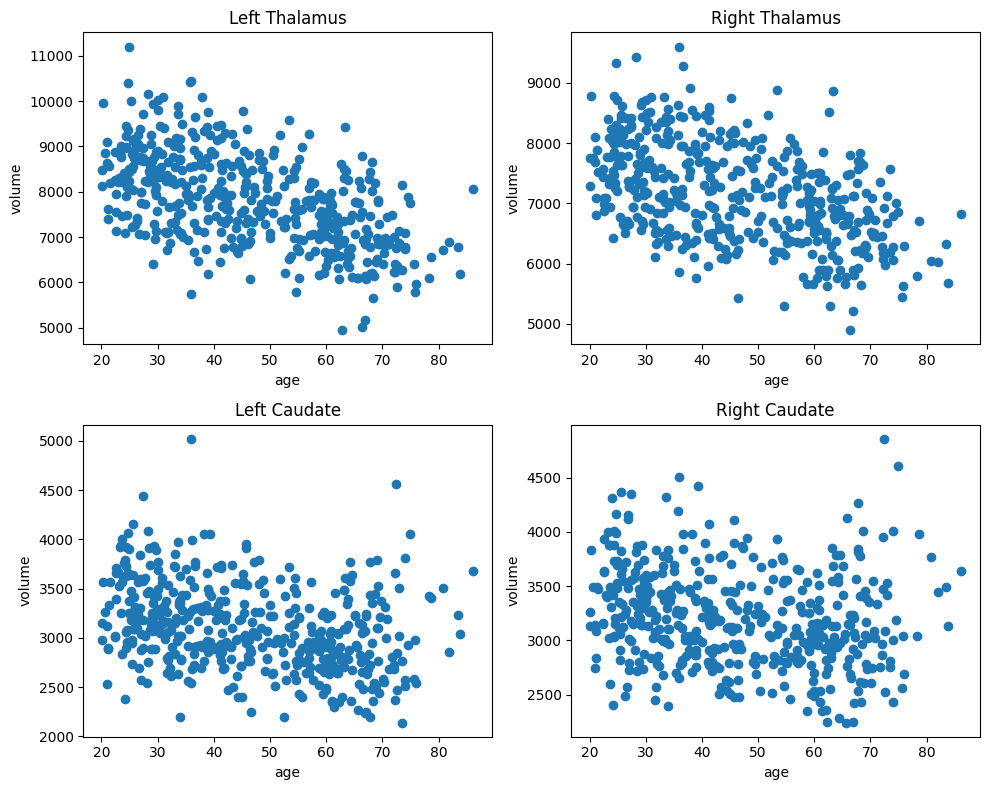

-0.381
-0.430
-0.329
-0.377


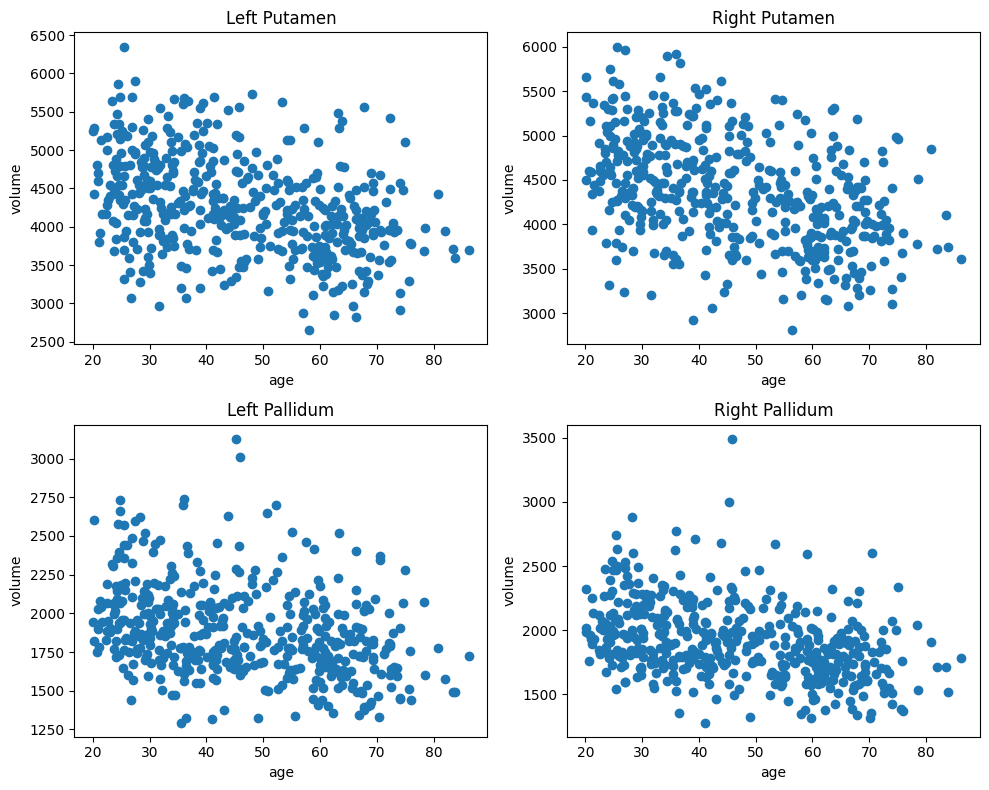

-0.280
-0.242
-0.305
-0.286


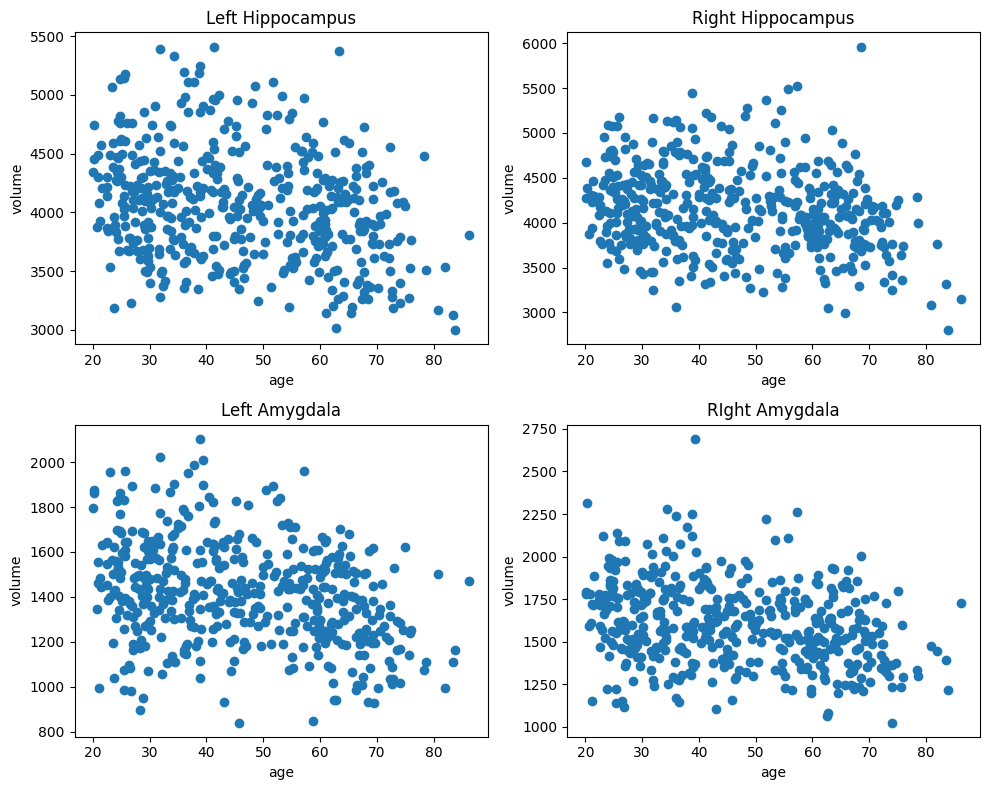

In [110]:
title_list = ['Left Thalamus', 'Right Thalamus', 'Left Caudate', 'Right Caudate',
              'Left Putamen',  'Right Putamen',  'Left Pallidum', 'Right Pallidum',
              'Left Hippocampus',  'Right Hippocampus', 'Left Amygdala', 'RIght Amygdala']
data = d.values
for i in range(0, 12, 4):
    fig, ax = plt.subplots(2, 2, figsize=(10, 8))
    
    for j in range(4):
        print(f'{np.corrcoef(data[:, i+j], data[:, -2])[0, 1]: 1.3f}')

        ax[j//2, j%2].set_title(title_list[i+j])
        ax[j//2, j%2].set_ylabel('volume')
        ax[j//2, j%2].set_xlabel('age')
        ax[j//2, j%2].scatter(data[:, -2], data[:, i+j])

    plt.tight_layout()    
    fig.savefig(f'prob3_scatter_{title_list[i].split(" ")[1]}_{title_list[i+2].split(" ")[1]}.svg')
    plt.show()